Давайте познакомимся с одним из способов выделения трендовой и сезонной компонент ряда и визуального анализа шума.

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('AirPassengers.csv') # считываем датасет
df.columns = (['Month','Pass']) # заменяем название столбца '#Passenger' на 'Pass' чтобы избежать путаницы с комментариями
df.head() # смотрим на первые несколько строчек

,Month,Pass
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# приводим индексы к стандарту pd.Datetime, чтобы потом это можно было скормить seasonal_decompose
df = df.set_index(pd.DatetimeIndex(df['Month'])) 
df.drop(['Month'], axis = 1, inplace = True)
df.head()

,Pass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
passengers=df.Pass

In [7]:
passengers.shape

(144,)

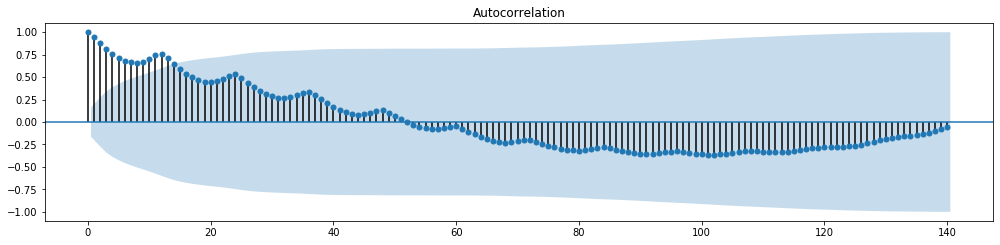

C:\tools\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


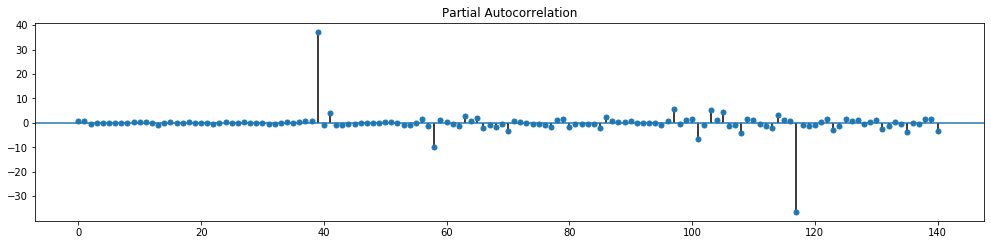

Критерий Дики-Фуллера: p=0.991880


In [25]:
plt.figure(figsize(17,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(passengers.squeeze(), lags=140, ax=ax)
plt.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(passengers.squeeze(), lags=140, ax=ax)
plt.show()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(passengers)[1])

In [23]:
passengers_1_diff = passengers.diff()
passengers_1_diff[0] = passengers[0]

In [17]:
passengers.shape[0]

144

In [37]:
def diff_1(arr):
    num = arr.shape[0]
    walk = np.zeros(num)
    walk[0] = arr[0]
    for i in range (1, num):
        walk[i] = arr[i] - arr[i-1]
        
    return walk

In [38]:
passengers_1_diff = diff_1(passengers)    

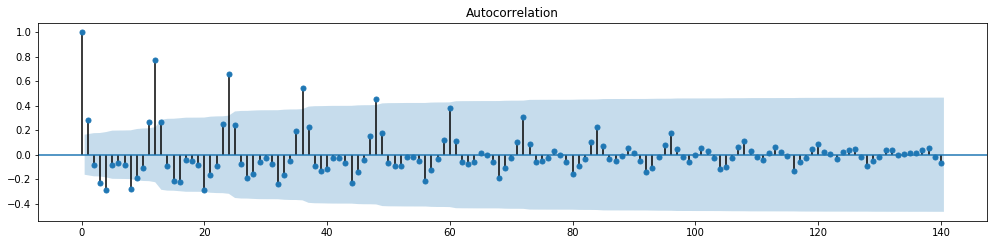

C:\tools\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


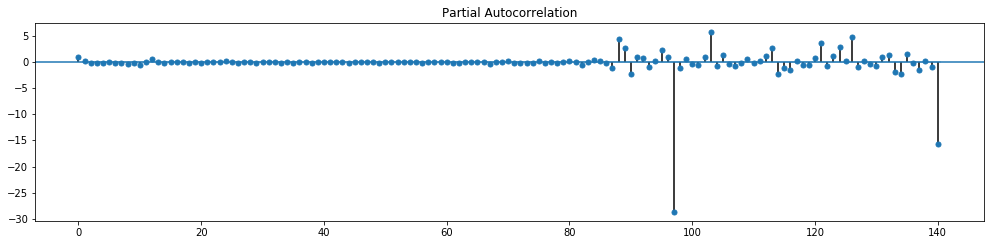

Критерий Дики-Фуллера: p=0.022734


In [39]:
plt.figure(figsize(17,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(passengers_1_diff.squeeze(), lags=140, ax=ax)
plt.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(passengers_1_diff.squeeze(), lags=140, ax=ax)
plt.show()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(passengers_1_diff)[1])

In [40]:
passengers_2_diff = diff_1(diff_1(passengers))  

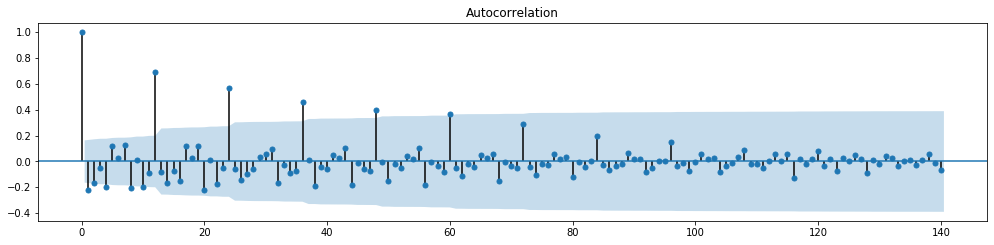

C:\tools\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


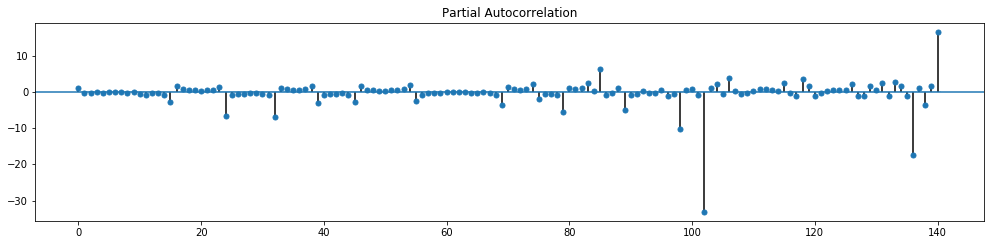

Критерий Дики-Фуллера: p=0.000000


In [41]:
plt.figure(figsize(17,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(passengers_2_diff.squeeze(), lags=140, ax=ax)
plt.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(passengers_2_diff.squeeze(), lags=140, ax=ax)
plt.show()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(passengers_2_diff)[1])

In [42]:
passengers_2_diff

array([ 112., -106.,    8.,  -17.,   -5.,   22.,   -1.,  -13.,  -12.,
         -5.,    2.,   29.,  -17.,   14.,    4.,  -21.,   -4.,   34.,
         -3.,  -21.,  -12.,  -13.,    6.,   45.,  -21.,    0.,   23.,
        -43.,   24.,   -3.,   15.,  -21.,  -15.,   -7.,    6.,   36.,
        -15.,    4.,    4.,  -25.,   14.,   33.,  -23.,    0.,  -45.,
         15.,   -1.,   41.,  -20.,   -2.,   40.,  -41.,   -5.,   20.,
          7.,  -13.,  -43.,    9.,   -5.,   52.,  -18.,  -19.,   63.,
        -55.,   15.,   23.,    8.,  -47.,  -25.,    4.,    4.,   52.,
        -13.,  -22.,   43.,  -32.,   -1.,   44.,    4.,  -66.,  -18.,
         -3.,    1.,   78.,  -35.,  -13.,   47.,  -44.,    9.,   51.,
        -17.,  -47.,  -42.,    1.,   14.,   70.,  -26.,  -23.,   69.,
        -63.,   15.,   60.,  -24.,  -41.,  -65.,    6.,   15.,   73.,
        -27.,  -26.,   66.,  -58.,   29.,   57.,  -16.,  -42., -115.,
         56.,   -4.,   76.,   -4.,  -41.,   82.,  -74.,   34.,   28.,
         24.,  -65.,

In [43]:
passengers_1_diff

array([ 112.,    6.,   14.,   -3.,   -8.,   14.,   13.,    0.,  -12.,
        -17.,  -15.,   14.,   -3.,   11.,   15.,   -6.,  -10.,   24.,
         21.,    0.,  -12.,  -25.,  -19.,   26.,    5.,    5.,   28.,
        -15.,    9.,    6.,   21.,    0.,  -15.,  -22.,  -16.,   20.,
          5.,    9.,   13.,  -12.,    2.,   35.,   12.,   12.,  -33.,
        -18.,  -19.,   22.,    2.,    0.,   40.,   -1.,   -6.,   14.,
         21.,    8.,  -35.,  -26.,  -31.,   21.,    3.,  -16.,   47.,
         -8.,    7.,   30.,   38.,   -9.,  -34.,  -30.,  -26.,   26.,
         13.,   -9.,   34.,    2.,    1.,   45.,   49.,  -17.,  -35.,
        -38.,  -37.,   41.,    6.,   -7.,   40.,   -4.,    5.,   56.,
         39.,   -8.,  -50.,  -49.,  -35.,   35.,    9.,  -14.,   55.,
         -8.,    7.,   67.,   43.,    2.,  -63.,  -57.,  -42.,   31.,
          4.,  -22.,   44.,  -14.,   15.,   72.,   56.,   14., -101.,
        -45.,  -49.,   27.,   23.,  -18.,   64.,  -10.,   24.,   52.,
         76.,   11.,

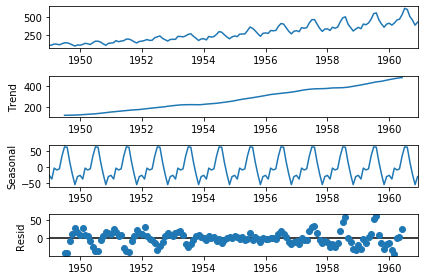

In [4]:
# применяем seasonal_decompose
# эта функция разложит ряд на трендовую, сезонную и шумовую составляющие
decomposition = seasonal_decompose(df, model='additive') 
decomposition.plot()
pyplot.show() # любуемся результатом

In [5]:
trend_part = decomposition.trend # отдельно трендовая составляющаяя
seasonal_part = decomposition.seasonal # отдельно сезонная составляющаяя
residual_part = decomposition.resid # отдельно шум: то, что осталось

In [6]:
# посмотрим повнимательнее на остатки в начале ряда
residual_part.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: resid, dtype: float64

In [7]:
# посмотрим повнимательнее на остатки в конце ряда
residual_part.tail()

Month
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, dtype: float64

In [8]:
# в конце и в начале стоят значения NaN. Это связано с особенностями алгоритма seasonal_decompose
# если мы хотим далее анализировать остатки, необходимо избавиться от этих некорректных значений
residual_part = residual_part.dropna()
residual_part.head()

Month
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
1949-11-01    28.593434
Name: resid, dtype: float64

Анализ результата:

В ряде явно присутствует тренд на рост и ярко выражена годовая сезонность

Остатки ряда не похожи не хаотичный белый шум и скорее всего все еще содержат закономерности